# Predicting the likelihood of e-signing a loan based on financial history

## Problem Statement & Background

Lending companies work by analyzing the financial history of their loan applicants, and choosing whether or not the applicant is too risky to be given a loan. 

When these companies do not have the data of their loan applicants, they sometimes partner with P2P (Peer 2 Peer) lending marketplaces, to acquire leads.

In this project, we will assess the 'quality' of leads and develop a model to predict for quality applicants (people who reach the e-signing process). The company wants to identify the low quality applicants, i.e., people who may not be interested in the onboarding process so that it can experiment by providing different onboarding setups.

**Data**: A dataset of all loan applicants

**Product**: A loan




## Step 1) Importing the data and data description

In [1]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random


In [2]:
data=pd.read_csv('P39-Financial-Data.csv')

In [3]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


### Description of the fields:

**entry_id**: unique identifier of the user

**age**: age of the user (all entries are 18 and above)

**pay_schedule**: how the user gets paid

**home_owner**: 1: the customer owns a home & 0: the customer has rented the place

**years_employed**: how many years the user has been employed for

**personal_account_m**:  number of months a customer had a personal account for

**personal_account_y**:  number of years a customer had a personal account for

**has_debt**:  whether or not a customer has any debt or not

**risk_score**: evaluates whether or not a user is likely to pay a loan (doesnt signify if a user will complete the onboarding process)

**risk_score_2/3/4/5**: risk scores based on different factors

**ext_quality_score**: scores obtained from the P2P marketplaces

**inquiries_last_month** number of inquiries a user had last month

## Step 2) EDA

In [4]:
# a description of the numerical columns of the dataset
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


### Notes

* Max age is 96 years old.

* Lowest income is 905.

* Max years employed is 16

* 79% of the people have debt

* Average amount requested is 950.

* Almost half of the users have e-signed. (balanced dataset)


In [5]:
# Cleaning the dataset
data.isna().sum()
#there are no null values present

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

### Histograms

In [6]:
# creating a new dataset with columns needed for the histogram

data2=data.drop(columns=['entry_id','pay_schedule','e_signed'])

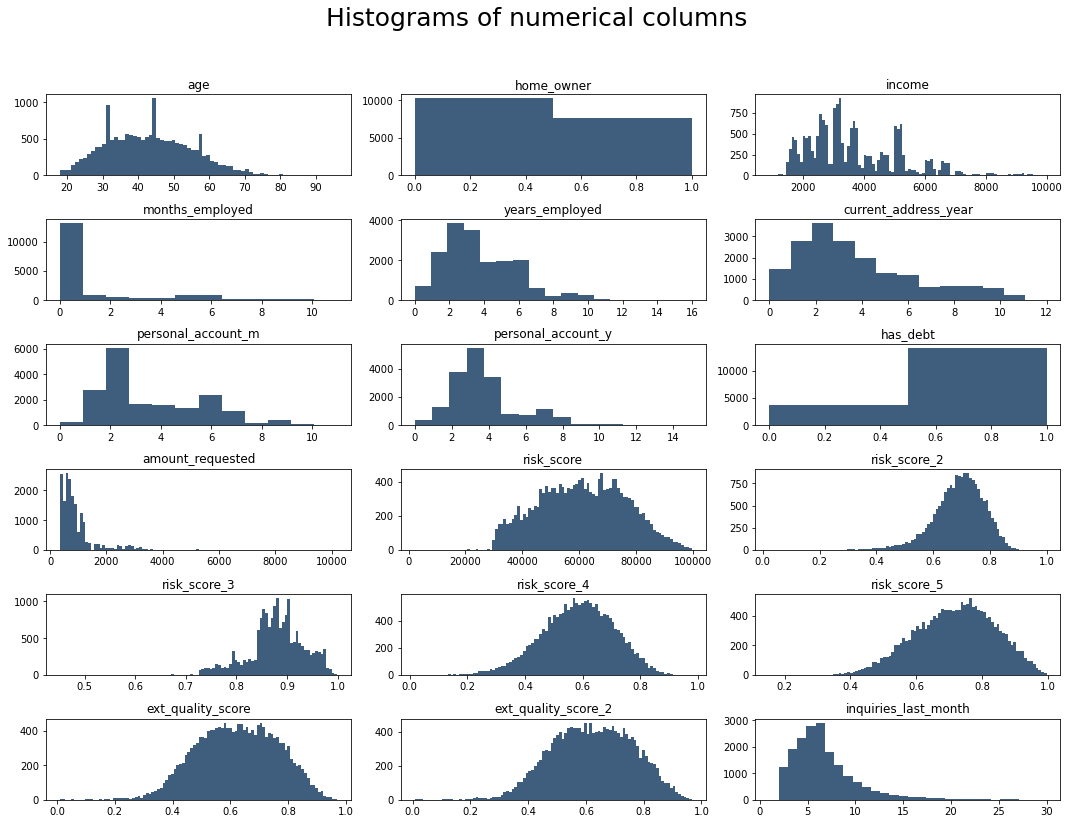

In [7]:
fig=plt.figure(figsize=(15,12))
plt.suptitle('Histograms of numerical columns',fontsize=25)

for i in range(data2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(data2.columns.values[i])
    
    vals=np.size(data2.iloc[:,i].unique())
    
    #to ensure the plots do not take long enough to be created.
    #if there are more than 100 bins, it will limit it to 100.
    if vals>100:
        vals=100
        
    plt.hist(data2.iloc[:,i],bins=vals,color='#3F5D7D')
    
plt.tight_layout(rect=[0,0.03,1,0.95])

### Notes:

* Home owner histogram is almost evenly distributed.

* Income seems to be most likely a right-skewed normal distribution.

* Its a little range that so many users have 0 values in 'months_employed'. It requires further scrutiny.

* 'current_address_year', 'personal_account_m','personal_account_y', 'years_employed' also seem to have a right skewed distribution.

* 'amount requested' is mostly below 2000.

* risk scores seem to be normally distributed except 'risk_score_3'.

* 'inquiries_last_month' is mainly between 3 and 10.




### Correlations

<AxesSubplot:title={'center':'Correlation with response variable'}>

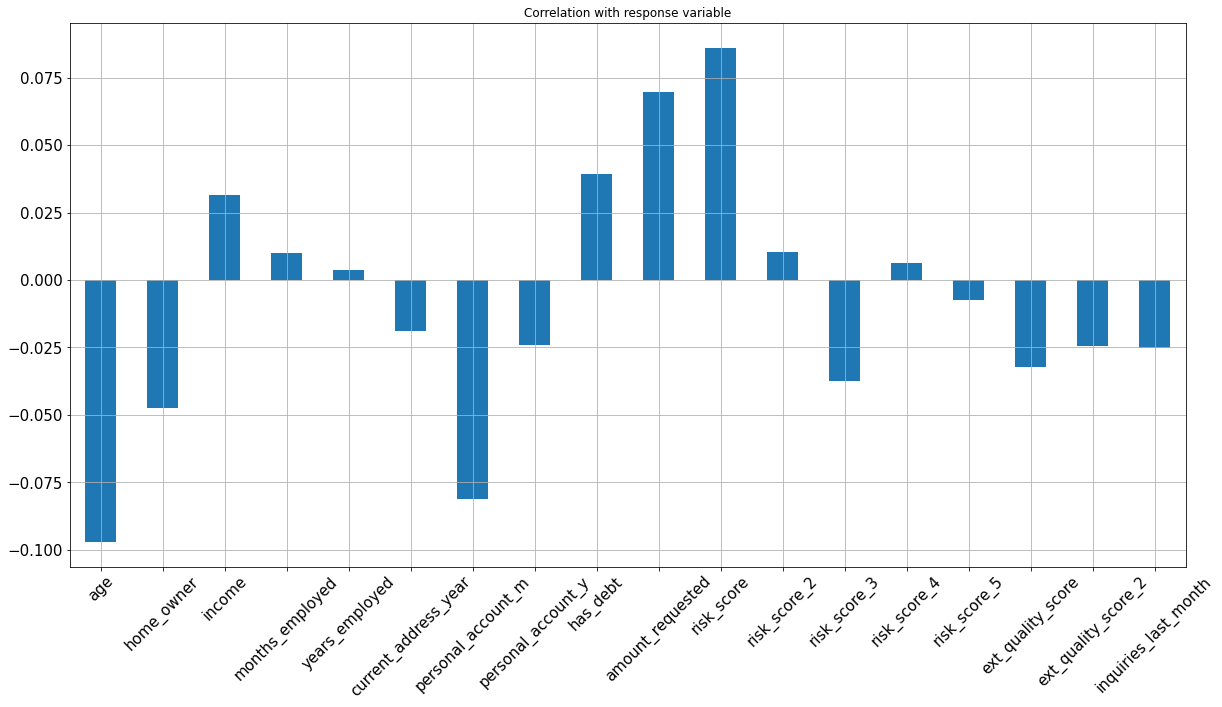

In [8]:
data2.corrwith(data['e_signed']).plot(kind='bar',
                                     title='Correlation with response variable',
                                     figsize=(20,10),
                                     fontsize=15,
                                     rot=45,  #rotating the x-ticks by 45 degrees
                                     grid=True)  #adding a grid to the background

### Notes:

* This plot assumes linear correlation which may not be true when models like Random Forest is utilized.

* 'age' is strongly negatively correlated, i.e., the older a user is, more likelier he/she is to complete the onboarding process.

* 'home_owner' is also negatively correlated, i.e., people who are renting a place are not likely to complete the onboarding process.

* 'income' is positively correlated.

* 'has_debt', 'amount_requested', 'risk_score' have the strongest positive correlations.

* None of the features are normalized yet. This will be done in the data preprocessing part

* Lastly, 'inquiries_last_month' has a negative correlatio, i.e., the more inquiries a user has, the lesser the chances are of the user completing the onboarding process.

### Correlation matrix

<AxesSubplot:>

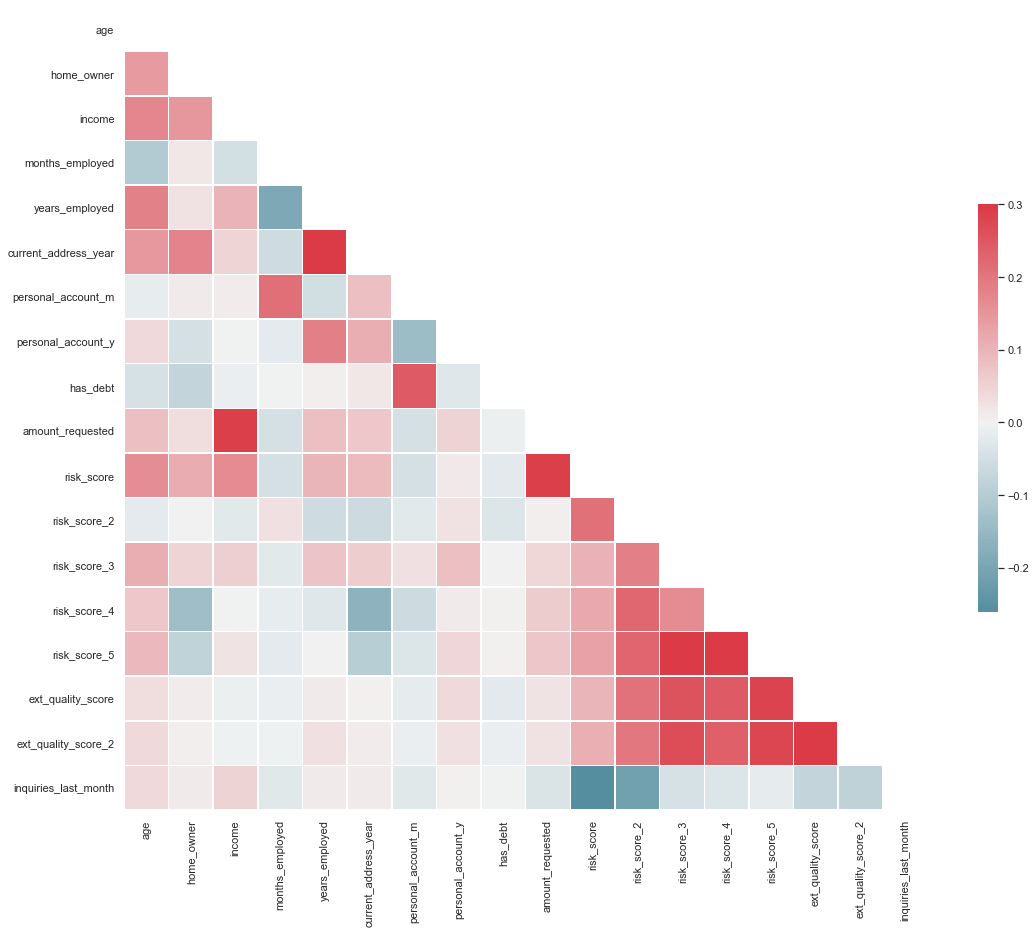

In [9]:
sns.set(style='white')

#computing the correlation matrix
corr=data2.corr()

#generate a mask for the upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#setting up the matplotlib figure
f,ax=plt.subplots(figsize=(18,15))

#generating a custom diverging colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

#drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmax=.3,
           center=0,square=True,linewidth=.5,
           cbar_kws={'shrink':.5})

### Notes:

* Age is somewhat related to the risk scores, 'income' and 'years_employed'.

* Dark red color signify a strong relationship. However, the strongest relationship is 0.3 which is not very strong relationship in reality.

* 'amount_requested' and 'income' have a significantly strong relationship, i.e., the more a person earns, the higher is the amount requested by him/her/they.

* 'years_employed' and 'current_address_year' have a strong relationship which is self-explanatory.

* Lower right area of the triangle have a bunch of relationships which are strong.

* There is, however, no need to remove variables since no value is greater than 0.3

## Step 3) Data Preprocessing

### Feature Engineering

In [10]:
import time
#to replicate results in the future
random.seed(100)

In [11]:
#dropping columns which are not needed
#'months_employed'-since it mostly contains zeros.

data=data.drop(columns=['months_employed'])

In [12]:
#to get a more centralized dataset, we will combine 'personal_account_y' and 'personal_account_m'

data['personal_account_months']=(data.personal_account_y*12 + data.personal_account_m)

In [13]:
data[['personal_account_m','personal_account_y','personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [14]:
data=data.drop(columns=['personal_account_m','personal_account_y'])

### One hot encoding & Feature Scaling

In [15]:
#one hot encoding categorical columns such as 'pay_schedule'
data=pd.get_dummies(data)

In [16]:
data.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [17]:
#we need to remove one of these dummy columns to avoid dependency.

data=data.drop(columns=['pay_schedule_semi-monthly'])

In [18]:
#removing extra columns
response=data['e_signed']
user=data['entry_id']

In [19]:
data=data.drop(columns=['entry_id','e_signed'])

In [20]:
# Splitting into training and testing

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=train_test_split(data, response, 
                                                test_size=0.2,
                                                random_state=0)

In [21]:
#Feature scaling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

#the result is going to be an array, losing the index and column names.

X_train2=pd.DataFrame(sc.fit_transform(X_train))
X_test2=pd.DataFrame(sc.transform(X_test))

#assigning column names
X_train2.columns=X_train.columns.values
X_test.columns=X_test.columns.values

#assigning index values
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

#setting the orignal set to be normalized ones
X_train=X_train2
X_test=X_test2



## Step 4) Model building

### 1) Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

#L2 (ridge) penalty so that any variable with a high coefficient is penalized.
classifier=LogisticRegression(random_state=0, penalty='l2')

In [60]:
#fitting the model
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [61]:
#predicting values
y_pred=classifier.predict(X_test)

#### Model Evaluation

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

#calculating the values to evaluate model performance.
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [63]:
#converting the values into a dataframe
results=pd.DataFrame([['Logistic Regression',acc, prec, rec, f1]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])

In [64]:
#viewing the dataframe
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817


**Recall is high, indicating tha the model has bias.**

### 2) Support Vector Machines (Linear)

In [65]:
from sklearn.svm import SVC

#creating an object
classifier=SVC(random_state=0, kernel='linear')

#fitting the model
classifier.fit(X_train, y_train)

#predicting values
y_pred2=classifier.predict(X_test)



#### Model Evaluation

In [66]:
#calculating the values to evaluate model performance.
acc2=accuracy_score(y_test,y_pred2)
prec2=precision_score(y_test,y_pred2)
rec2=recall_score(y_test,y_pred2)
f12=f1_score(y_test,y_pred2)

model_results=pd.DataFrame([['SVM (linear)',acc2, prec2, rec2, f12]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])

results=results.append(model_results, ignore_index=True)

In [67]:
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568398,0.577769,0.735996,0.647354


### 3) Support Vector Machines (RBF)

In [68]:
from sklearn.svm import SVC

#creating an object
classifier=SVC(random_state=0, kernel='rbf')

#fitting the model
classifier.fit(X_train, y_train)

#predicting values
y_pred3=classifier.predict(X_test)

#### Model Evaluation

In [69]:
#calculating the values to evaluate model performance.
acc3=accuracy_score(y_test,y_pred3)
prec3=precision_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)

model_results3=pd.DataFrame([['SVM (rbf)',acc3, prec3, rec3, f13]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])

results=results.append(model_results3, ignore_index=True)

In [70]:
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505


### 4) Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

#creating an object
classifier=RandomForestClassifier(random_state=0,
                                  n_estimators=100,
                                 criterion='entropy')
#fitting the model
classifier.fit(X_train, y_train)

#predicting the values
y_pred3=classifier.predict(X_test)

#### Model Evaluation

In [74]:
#calculating the values to evaluate model performance.
acc3=accuracy_score(y_test,y_pred3)
prec3=precision_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)

model_results3=pd.DataFrame([['Random Forest',acc3, prec3, rec3, f13]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])

results=results.append(model_results3, ignore_index=True)

In [75]:
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest,0.621720,0.640098,0.678942,0.658948


#### K-fold cross validation on Random Forest

In [77]:
from sklearn.model_selection import cross_val_score

#creating a 10 fold Cross-validation
accuracies=cross_val_score(estimator=classifier,
                           X=X_train,
                           y=y_train,
                           cv=10)
print("Random Forest Classifier accuracy: %0.2f (+/- %0.2f)" %(accuracies.mean(),accuracies.std()*2))


Random Forest Classifier accuracy: 0.63 (+/- 0.03)


 ## Step 5) Parameter Tuning

### Applying Grid Search

Grid search applies various parameters to the model and checks which performs the best on our dataset

#### Round1-Entropy

In [84]:
paramters={'max_depth':[3,None], #default is none
           'max_features':[1,5,10],
           'min_samples_split':[2,5,10], #default is 2
           'min_samples_leaf':[1,5,10],
           'bootstrap':[True, False],
           'criterion':['entropy']}

In [85]:
from sklearn.model_selection import GridSearchCV

#creating an object
grid_search=GridSearchCV(estimator=classifier,  #random forest
                        param_grid=paramters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1) #use everything available

In [86]:
t0=time.time()
grid_search=grid_search.fit(X_train,y_train)
t1=time.time() #to calculate the time it took to run the model

In [87]:
#printing the total running time
print("Took %0.2f seconds" % (t1-t0))

Took 1135.05 seconds


In [88]:
#printing the best values
rf_best_accuracy=grid_search.best_score_
rf_best_params=grid_search.best_params_
rf_best_accuracy, rf_best_params

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

#### Round2-Entropy

In [89]:
paramters={'max_depth':[None], #default is none
           'max_features':[3,5,7],
           'min_samples_split':[2,5,6], #default is 2
           'min_samples_leaf':[4,5,6],
           'bootstrap':[True],
           'criterion':['entropy']}

In [90]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(estimator=classifier,  #random forest
                        param_grid=paramters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1) #use everything available

In [91]:
t0=time.time()
grid_search=grid_search.fit(X_train,y_train)
t1=time.time()

In [92]:
print("Took %0.2f seconds" % (t1-t0))

Took 258.56 seconds


In [93]:
#printing the best values
rf_best_accuracy=grid_search.best_score_
rf_best_params=grid_search.best_params_
rf_best_accuracy, rf_best_params

(0.6348606470778575,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 7,
  'min_samples_leaf': 6,
  'min_samples_split': 2})

**This provides the highest accuracy!**

In [94]:
y_pred4=grid_search.predict(X_test)

In [95]:
acc4=accuracy_score(y_test,y_pred4)
prec4=precision_score(y_test,y_pred4)
rec4=recall_score(y_test,y_pred4)
f14=f1_score(y_test,y_pred4)

model_results3=pd.DataFrame([['Random Forest (GS*2+Entropy)',acc4, prec4, rec4, f14]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])

results=results.append(model_results3, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest,0.621720,0.640098,0.678942,0.658948
4,Random Forest (GS*2+Entropy),0.626466,0.641148,0.695021,0.666999


### Round1-Gini

In [96]:
paramters={'max_depth':[3,None], #default is none
           'max_features':[1,5,10],
           'min_samples_split':[2,5,10], #default is 2
           'min_samples_leaf':[1,5,10],
           'bootstrap':[True, False],
           'criterion':['gini']}

from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(estimator=classifier,  #random forest
                        param_grid=paramters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1) #use everything available

#calculating the time it took to run the model
t0=time.time()
grid_search=grid_search.fit(X_train,y_train)
t1=time.time()

print("Took %0.2f seconds" % (t1-t0))

#printing the best values
rf_best_accuracy=grid_search.best_score_
rf_best_params=grid_search.best_params_
rf_best_accuracy, rf_best_params



Took 740.13 seconds


(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

### Round2-Gini

In [97]:
paramters={'max_depth':[None], #default is none
           'max_features':[8,10,12],
           'min_samples_split':[2,5,6], #default is 2
           'min_samples_leaf':[4,5,6],
           'bootstrap':[True],
           'criterion':['gini']}

from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(estimator=classifier,  #random forest
                        param_grid=paramters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1) #use everything available

#calculating the time needed to run the model
t0=time.time()
grid_search=grid_search.fit(X_train,y_train)
t1=time.time()

print("Took %0.2f seconds" % (t1-t0))

#printing the best values
rf_best_accuracy=grid_search.best_score_
rf_best_params=grid_search.best_params_
rf_best_accuracy, rf_best_params

Took 304.49 seconds


(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [98]:
y_pred5=grid_search.predict(X_test)

In [99]:
acc5=accuracy_score(y_test,y_pred5)
prec5=precision_score(y_test,y_pred5)
rec5=recall_score(y_test,y_pred5)
f15=f1_score(y_test,y_pred5)

model_results3=pd.DataFrame([['Random Forest (GS*2+Gini)',acc5, prec5, rec5, f15]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])

results=results.append(model_results3, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.562535,0.576386,0.706432,0.634817
1,SVM (linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Random Forest,0.621720,0.640098,0.678942,0.658948
4,Random Forest (GS*2+Entropy),0.626466,0.641148,0.695021,0.666999
5,Random Forest (GS*2+Gini),0.639587,0.653494,0.703320,0.677492


## Formatting Final Results

In [101]:
#summing everything into a final dataframe
final_results=pd.concat([y_test, user],axis=1).dropna()
final_results['predictions']=y_pred5
final_results=final_results[['entry_id','e_signed','predictions']]
final_results.head()

## Step 6) Conclusion

* Our model has given an accuracy of 64%.

* One way to use this model is to target those predicted not to reach the e-signing phase with customized onboarding.

* With the new onboarding screens built intentionally to lead users to finalize the loan application, we can attempt to get more than 40% of those predicted not to finish the process and complete the e-sign up step.

* Increasing the number of loans provided will increase the profit for the lending company.